<a href="https://colab.research.google.com/github/rhoadesScholar/JeffsMatland/blob/master/Neuro1401_Grp6_Proj1_JLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prompt #1
def get_V_avg(R, ITI, D):
  return R / (ITI + D)

def get_V_exp(R, gamma, D):
  return gamma**D * R

def get_eq_avg(R, ITI, V):
  return R / V - ITI

def get_eq_exp(R, gamma, V):
  return np.log(V / R) / np.log(gamma)

def get_eq_avg_pt(Rs, ITI, D):
  V = get_V_avg(Rs[0], ITI, D)
  return V, Rs[1] / V - ITI

def get_eq_exp_pt(Rs, gamma, D):
  V = get_V_exp(Rs[0], gamma, D)
  return V, np.log(V / Rs[1]) / np.log(gamma)

def get_tds_singleCompare(Rs, Ds, ITI, gamma, C=0):
  tds_avg = np.ndarray((len(Rs), len(Ds)))
  tds_exp = np.ndarray((len(Rs), len(Ds)))
  
  tds_avg[0] = [get_V_avg(Rs[0]+C, ITI, D) for D in Ds]
  tds_exp[0] = [get_V_exp(Rs[0]+C, gamma, D) for D in Ds]

  tds_avg[1] = [get_eq_avg(Rs[1]+C, ITI, V) for V in tds_avg[0]]
  tds_exp[1] = [get_eq_exp(Rs[1]+C, gamma, V) for V in tds_exp[0]]
  
  return tds_avg, tds_exp

def get_tds_panda(Rs, Ds, ITIs, gammas, Cs=[0]):
  data = []

  for D in Ds:
    for C in Cs:
      for ITI, gamma in zip(ITIs, gammas):
        V_1, D_2 = get_eq_avg_pt(Rs+C, ITI, D)
        data.append({'V_1': V_1,
                   'D_2': D_2, 
                   'type':'avg_reward', 
                   'ITI/gamma': (ITI, gamma),
                   'Rs': Rs,
                   'R_1': Rs[0],
                   'R_2': Rs[1],
                   'D': D,
                   'C': C,
                   })    
        
        V_1, D_2 = get_eq_exp_pt(Rs+C, gamma, D)
        data.append({'V_1': V_1,
                   'D_2': D_2, 
                   'type':'exponential', 
                   'ITI/gamma': (ITI, gamma),
                   'Rs': Rs,
                   'R_1': Rs[0],
                   'R_2': Rs[1],
                   'D': D,
                   'C': C,
                   })
  return pd.DataFrame(data=data)

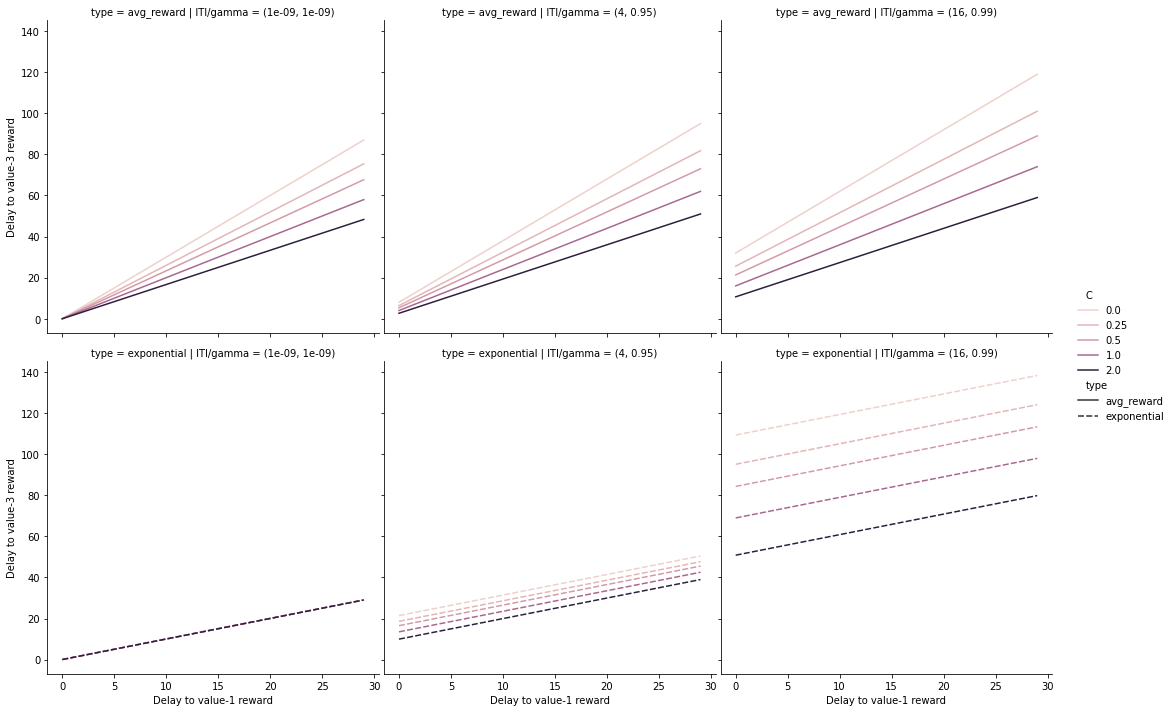

In [47]:
Rs = np.array((1, 3))
Ds = np.array(range(30))
ITIs = [1e-9, 4, 16]
gammas = [1e-9, 0.95, 0.99]
Cs = [0, 0.25, 0.5, 1, 2]
df = get_tds_panda(Rs, Ds, ITIs, gammas, Cs)

g = sns.relplot(data=df, kind='line', 
            col="ITI/gamma",  
            row="type", 
            x="D", 
            y="D_2", 
            hue='C', 
            style='type', 
            # size='ITI/gamma',
            )
(g.set_axis_labels(f"Delay to value-{min(df['R_1'])} reward", f"Delay to value-{max(df['R_2'])} reward")
  # .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))